In [1]:
from os.path import join as join
from os import listdir
import os
import sys
import rootpath
sys.path.append(rootpath.detect())
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

from testsuite.utilities import Pareto_split
from experiments.igd_refpoints.igd_utilities import *

In [2]:
import matplotlib
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import MaxNLocator

In [3]:
# establish up data paths
try: 
    get_ipython().__class__.__name__
    script_dir = os.path.dirname(os.path.realpath(__file__))
except:
     script_dir = './'
if not os.path.isdir('./figures'):
    os.makedirs("./figures")

In [4]:
def save_fig(fig, name=None):
    figname_stub = script_dir.split('/')[-1]
    if name is None:
        filename = figname_stub+"_"+fig.get_title()
    else:
        filename = figname_stub+"_"+name
    
    savedirs = [os.path.join(script_dir, "figures/"),
                "/home/finley/phd/papers/SAF-driven-EMO/figures/"]
    for d in savedirs:
        fig.savefig(os.path.join(d, filename+".png"), dpi=300, facecolor=None, edgecolor=None,
        orientation='portrait', pad_inches=0.12)
        fig.savefig(os.path.join(d, filename+".pdf"), bbox_inches = 'tight', pad_inches = 0, dpi=300, facecolor=None, edgecolor=None,
        orientation='portrait')

In [27]:
data_dir=join(rootpath.detect(), 'experiments/data/wfg6_3obj_6dim/')
data_dir

'/home/finley/phd/code/testsuite/experiments/data/wfg6_3obj_6dim/'

In [28]:
safmu_dir = join(data_dir, 'log_data/WFG6_Saf_init10_MultiSurrogate_mean/')
safmu_seed = 5
safmu_path = [d for d in listdir(safmu_dir) if '{:02d}'.format(safmu_seed) in d.split('_') and d.split('_')[-1]== 'results.pkl' ][0]
safmu_path = join(safmu_dir, safmu_path)
safmu_path

'/home/finley/phd/code/testsuite/experiments/data/wfg6_3obj_6dim/log_data/WFG6_Saf_init10_MultiSurrogate_mean/test_function_Saf_init10_MultiSurrogate_meanseed_05__68c81f88-08a5-11eb-82ea-f722d7d902f9_results.pkl'

In [29]:
safei_dir = join(data_dir, 'log_data/WFG6_Saf_init10_MultiSurrogate_ei/')
safei_seed = 5
safei_path = [d for d in listdir(safei_dir) if '{:02d}'.format(safei_seed) in d.split('_') and d.split('_')[-1]== 'results.pkl' ][0]
safei_path = join(safei_dir, safei_path)
safei_path

'/home/finley/phd/code/testsuite/experiments/data/wfg6_3obj_6dim/log_data/WFG6_Saf_init10_MultiSurrogate_ei/test_function_Saf_init10_MultiSurrogate_eiseed_05__68c5d520-08a5-11eb-82ea-f722d7d902f9_results.pkl'

In [30]:
sms_dir = join(data_dir, 'log_data/WFG6_SmsEgo_init10_MultiSurrogate/')
sms_seed = 5
sms_path = [d for d in listdir(sms_dir) if '{:02d}'.format(sms_seed) in d.split('_') and d.split('_')[-1]== 'results.pkl' ][0]
sms_path = join(sms_dir, sms_path)
sms_path

'/home/finley/phd/code/testsuite/experiments/data/wfg6_3obj_6dim/log_data/WFG6_SmsEgo_init10_MultiSurrogate/seed_05_WFG6_SmsEgo_init10_MultiSurrogate_082f9e68-6a74-11eb-acdb-0ffa7d871549_results.pkl'

In [31]:
with open(safei_path, 'rb') as infile:
    safei_result = pkl.load(infile)

In [32]:
with open(safmu_path, 'rb') as infile:
    safmu_result = pkl.load(infile)

In [33]:
with open(sms_path, 'rb') as infile:
    sms_result = pkl.load(infile)

In [34]:
## regular samples
M = 3
H = 50

sj = np.array([i/H for i in range(H+1)])
print(sj.shape)

s = []
for s1 in sj:
    for s2 in sj:
        for s3 in sj:
            if np.round_(s1+s2+s3, decimals=9) == 1.0:
                s.append([s1, s2, s3])
s = np.array(s)

mags = np.array([np.linalg.norm(i) for i in s])
sp = (s.T/mags).T

(51,)


In [35]:
markers = ["o", "d", "^", "P", "X", "v", "*", "s", '>']
cmap = matplotlib.cm.tab10
# colors = cmap(np.linspace(0, 1, len(result_dirs)+1))
colors = cmap([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [36]:
import matplotlib
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import MaxNLocator


matplotlib.rcParams['mathtext.fontset'] = 'stix';
matplotlib.rcParams['font.family'] = 'STIXGeneral';
matplotlib.rcParams['font.size'] = 15 ;
matplotlib.rcParams['legend.fontsize'] = 11
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

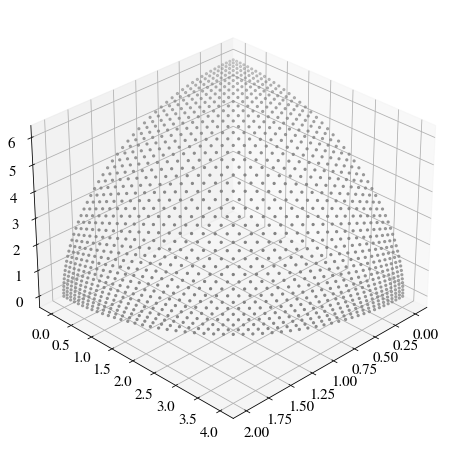

In [14]:
fig = plt.figure(figsize=[8,8])
ax = fig.gca(projection='3d')
ax.scatter(*(sp*np.array([2, 4, 6])).T, c="grey", s=5)
ax.view_init(30, 45)

In [41]:
psms, dsms = Pareto_split(sms_result['y'][:150])
psafmu, dsafmu = Pareto_split(safmu_result['y'][:150])
%matplotlib qt
fig = plt.figure(figsize=[8,8])
ax = fig.gca(projection='3d')
# ax_format(ax, axes=[2., 4., 6.], vp=[35, 15])
ax_format(ax, axes=[1., 1., 1.], vp=[35, 60])
ax.scatter(*(sp*np.array([2, 4, 6])).T, c="grey", s=20,  marker='+', linewidth=0.5)
ax.scatter(*psms.T, s=14, label='SMS-EGO', c=colors[5], marker  = markers[5])
ax.scatter(*psafmu.T, s=14, label='Saf$_\mu$', c=colors[3], marker=markers[3])
ax.legend()

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$", labelpad=10)
ax.set_zlabel("$f_3$")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))

save_fig(fig, name="comparison_attainmenPoints_sms_saf")

No handles with labels found to put in legend.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[1.0, 1.0, 1.0]
3d


In [42]:
psafei, dsafei = Pareto_split(safei_result['y'][:150])
fig = plt.figure(figsize=[8,8])
ax = fig.gca(projection='3d')
ax_format(ax, axes=[1., 1., 1.], vp=[35, 60])
ax.scatter(*(sp*np.array([2, 4, 6])).T, c="grey", s=20, marker='+', linewidth=0.5)
ax.scatter(*psafei.T, s=14, label='Saf$_{EI}$', c=colors[4], marker  = markers[4])
ax.scatter(*psafmu.T, s=14, label='Saf$_\mu$', c=colors[3], marker=markers[3])
ax.legend()

ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$", labelpad=10)
ax.set_zlabel("$f_3$")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))

save_fig(fig, name="comparison_attainmenPoints_safei_safmu")

No handles with labels found to put in legend.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


[1.0, 1.0, 1.0]
3d
